In [4]:
# import
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# set style
mpl.style.use("ggplot")

# plot inline
%matplotlib inline

In [5]:
import pandas as pd
# load dataframe containing card_portion, card_count, cog, prevalance
cluster_detail = pd.read_pickle("../../cdhitResult/cluster_detail_tmp1010")

In [6]:
cluster_detail

,representing gene length,representing gene header,mean similarity,mean length,member,card_portion,card_count,cog,prevalance
Cluster 0,6925,JMVJ01000010_255|1438681.3,93.575,314.773,",JMVT01000001_310|1438693.3,JMVT01000001_310|1...",0.0,0.0,NaN,0.118644
Cluster 1,5901,JMVT01000001_309|1438693.3,85.7143,843,",JMVT01000001_309|1438693.3,JMVT01000001_309|1...",0.0,0.0,NaN,0.033898
Cluster 2,5423,AYIO01000007_135|1328432.3,66.6667,1807.67,",AYIO01000007_135|1328432.3,AYIO01000007_135|1...",0.0,0.0,NaN,0.016949
Cluster 3,3903,JAPE01000016_72|1400157.3,95.8007,86,",JAPE01000016_72|1400157.3,JMVT01000009_1|1438...",0.0,0.0,NaN,0.084746
Cluster 4,3709,JMVU01000017_403|1438694.3,90.1891,337.182,",JMVT01000007_404|1438693.3,JMVT01000008_1|143...",0.0,0.0,NaN,0.033898
Cluster 5,3515,JAPJ01000004_98|1328443.3,97.0588,103.382,",JAPJ01000004_98|1328443.3,JAPJ01000004_98|132...",0.0,0.0,NaN,0.186441
Cluster 6,3321,562.10576.con.0004_205|562.10576,66.6667,1107,",562.10576.con.0004_205|562.10576,562.10576.co...",0.0,0.0,NaN,0.016949
Cluster 7,3262,JMVN01000033_15|1438685.3,92.0713,217.467,",JJMX01000035_1|1445863.3,JJMX01000061_1|14458...",0.0,0.0,U,0.033898
Cluster 8,3206,JMVB01000013_10|1438673.3,85.7014,458,",JMVB01000013_10|1438673.3,JMVB01000013_10|143...",0.0,0.0,Q,0.033898
Cluster 9,3163,JMUY01000001_1232|1438670.3,98.9908,21.3716,",JMUY01000001_1232|1438670.3,JAPE01000009_453|...",0.0,0.0,Q,0.779661


In [7]:
df = pd.read_pickle("../../cdhitResult/ec0913_df")

# core genome, accessory genome
gene_count = df.sum(axis = 0)
core = gene_count.loc[gene_count == 59] 
accessory = gene_count.loc[gene_count != 59]
unique = gene_count.loc[gene_count == 1]
print(len(core), len(accessory), len(unique))

# determine how conserved they are: they are all similar
core_sim = cluster_detail.loc[core.index.values, 'mean similarity'].mean()
acc_sim = cluster_detail.loc[accessory.index.values, 'mean similarity'].mean()
print(core_sim, acc_sim)

# determine the length gap between representing sequence and other members of the family
core_len_gap_se = cluster_detail.loc[core.index.values, 'representing gene length'] - cluster_detail.loc[core.index.values, 'mean length']
accessory_len_gap_se = cluster_detail.loc[accessory.index.values, 'representing gene length'] - cluster_detail.loc[accessory.index.values, 'mean length']
print(core_len_gap_se.mean(), accessory_len_gap_se.mean())

2874 13076 5522
98.943429783 82.2062326726
329.147581819 224.352406137


In [8]:
# count cog
def cog_dis(df): # parse cog
    result = pd.DataFrame(np.zeros((1,26)), columns = ['J','A','K','L','B','D','Y','V','T','M','N','Z','W','U','O','C','G','E','F','H','I','P','Q','R','S','NaN'])
    cog = list(df.loc[df['cog'].notnull()]['cog'])
    for str in cog:
        for s in str:
            result[s] += 1
    result['NaN'] = df.shape[0]-len(cog)
    return(result)
            
        

In [10]:
# apply count cog to all of them!
import math
cog_seperate = pd.DataFrame(columns = ['J','A','K','L','B','D','Y','V','T','M','N','Z','W','U','O','C','G','E','F','H','I','P','Q','R','S','NaN'])
for percentile in range(11):
    sub_df = cluster_detail.loc[cluster_detail['prevalance'].apply(lambda x: math.floor(x/0.1)) == percentile]
    cog_seperate = cog_seperate.append(cog_dis(sub_df), ignore_index = True)

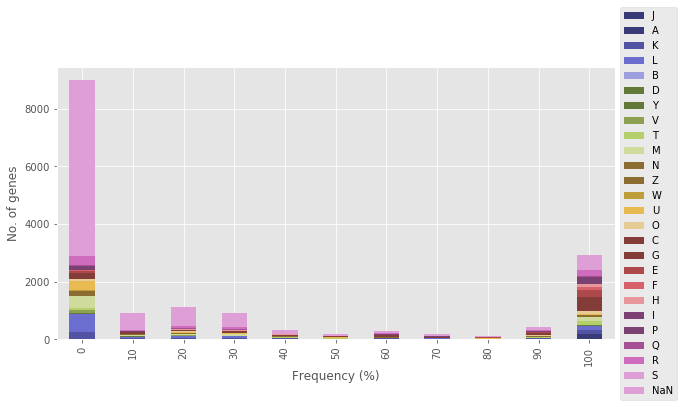

In [23]:
# move legend to side

ax = cog_seperate.plot(kind = 'bar', figsize = (10,5),  stacked=True, colormap = 'tab20b')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Frequency (%)")
ax.set_xticklabels(range(0,110,10))
ax.set_ylabel("No. of genes")

In [24]:
# pangenome distribution with card category
card_seperate = pd.DataFrame(columns = ['card', 'no card'])
for percentile in range(11):
    sub_df = cluster_detail.loc[cluster_detail['prevalance'].apply(lambda x: math.floor(x/0.1)) == percentile]
    card = sub_df.loc[sub_df['card_count'] > 0].shape[0]
    no_card = sub_df.shape[0]-card
    card_seperate = card_seperate.append({'card':card,
                                         'no card': no_card}, ignore_index = True)

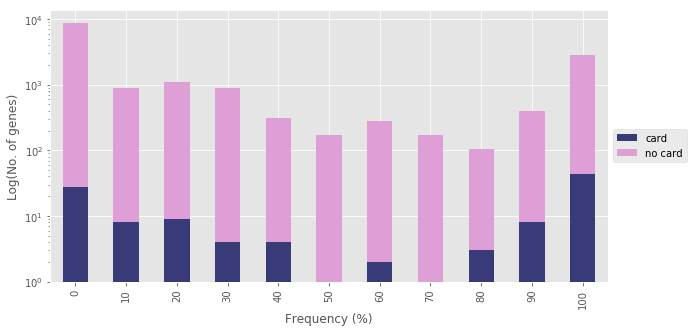

In [44]:

ax = card_seperate.plot(kind = 'bar', figsize = (10,5), xticks= card_seperate.index, stacked=True,logy = True, colormap = 'tab20b')
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_xlabel("Frequency (%)")
ax.set_xticklabels(range(0,110,10))
ax.set_ylabel("Log(No. of genes)")

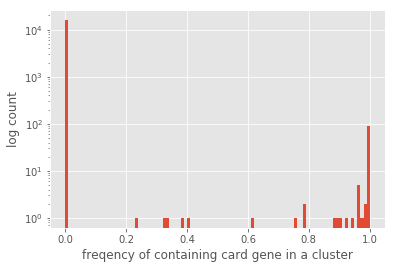

In [26]:
fig, ax = plt.subplots()
cluster_detail['card_portion'].hist(bins = 100, ax = ax)
ax.set_yscale('log')
ax.set_ylabel("log count")
ax.set_xlabel("freqency of containing card gene in a cluster")

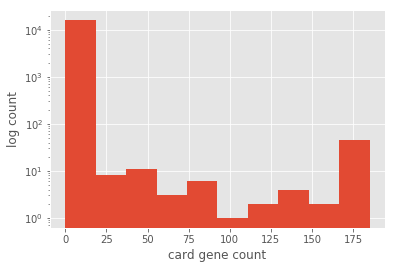

In [27]:
fig, ax = plt.subplots()
cluster_detail['card_count'].hist(bins = 10, ax = ax)
ax.set_yscale('log')
ax.set_ylabel("log count")
ax.set_xlabel("card gene count")

In [28]:
ct = pd.DataFrame(columns = ['core', 'accessory', 'pangenome'])
i = 0
for index, row in df.iterrows():
    i = i + 1
    count = df.iloc[:i, :]
    
    count = count.sum(axis = 0)
    
    al = len(count.loc[count > 0])
    cr = len(count.loc[count == i])
    acc = al - cr ######
    ct.loc[index, 'core'] = cr
    ct.loc[index, 'accessory'] = acc
    ct.loc[index, 'pangenome'] = al

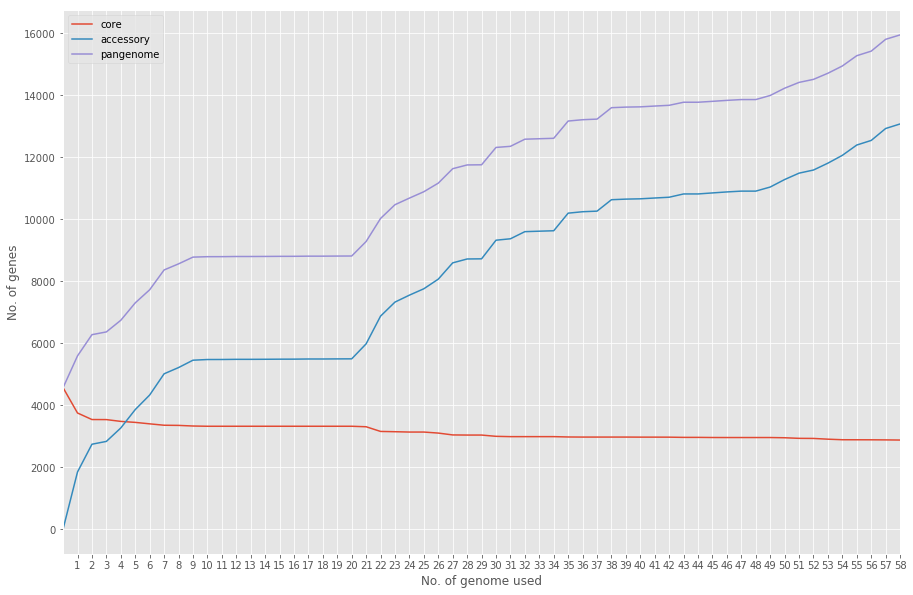

In [45]:
ax = ct.plot(xticks = np.arange(1, 59, 1), use_index = False, figsize = (15,10))
ax.set_xlabel("No. of genome used")
ax.set_ylabel("No. of genes")

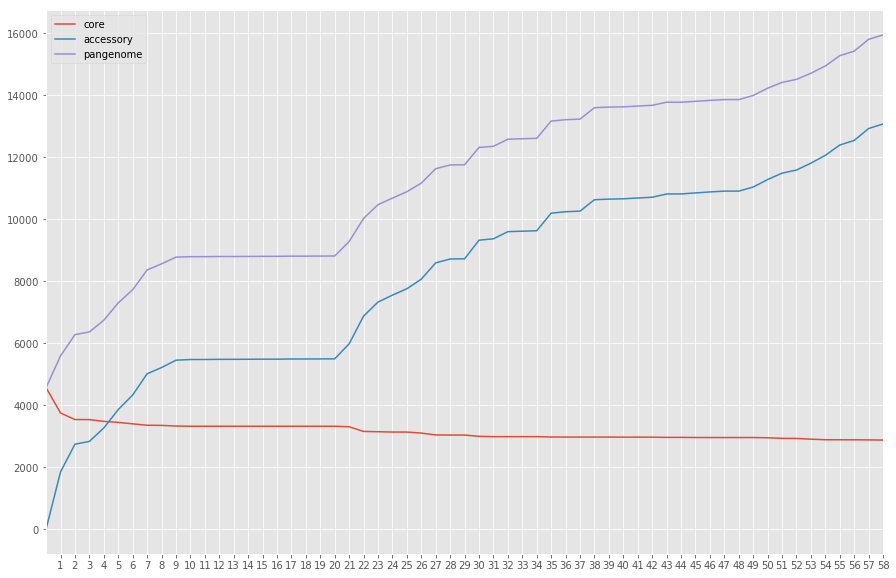

In [30]:
ct.plot(xticks = np.arange(1, 59, 1), use_index = False, figsize = (15,10))

In [67]:
# core and accessory cog difference
core_cog = cog_dis(cluster_detail.loc[cluster_detail['prevalance']==1])
acc_cog = cog_dis(cluster_detail.loc[cluster_detail['prevalance']<1])
both_cog = core_cog.append(acc_cog, ignore_index = True)
both = both_cog.rename(index = {0:'core', 1:'accessory'})
both.to_excel("/home/hermuba/resistanceExp/EcoliGenomes/figures/core_acc_cog_distribution.xlsx")

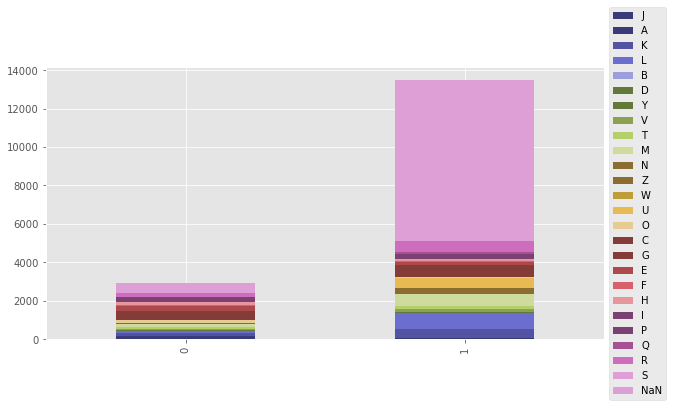

In [55]:
both_cog.plot(kind = 'bar', figsize = (10,5), stacked=True, colormap = 'tab20b').legend(loc='center left', bbox_to_anchor=(1, 0.5))

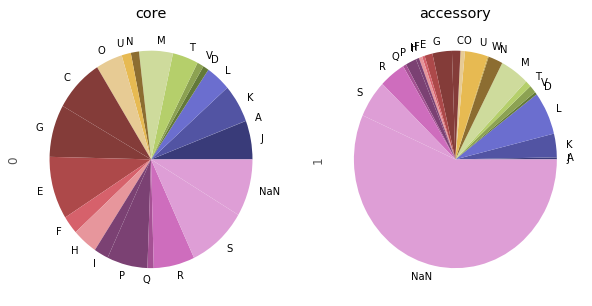

In [65]:
ax = both_cog.transpose().plot(kind = 'pie', figsize = (10,5),use_index = False, subplots = True, stacked=True, colormap = 'tab20b', legend = False)
ax[0].set_title("core")
ax[1].set_title("accessory")

In [34]:
both_cog.sum(axis = 1)

0     2922.0
1    13468.0
dtype: float64

In [35]:
freq_cog = both_cog
freq_cog.iloc[0,:] = both_cog.iloc[0,:]/2922
freq_cog.iloc[1,:] = both_cog.iloc[1,:]/13468


In [36]:
(freq_cog.iloc[0,:]/freq_cog.iloc[1,:]).sort_values()

W       0.000000
NaN     0.150457
U       0.401203
N       0.561373
L       0.620260
V       0.921834
M       1.159679
R       1.566462
K       1.621022
S       1.706191
Q       1.882619
A       2.304586
D       2.348069
G       2.514094
P       3.738770
T       4.254620
I       4.609172
C       5.882424
O       6.016182
F       6.743048
H       7.287474
E       7.401788
J      19.358522
B            NaN
Y            NaN
Z            NaN
dtype: float64

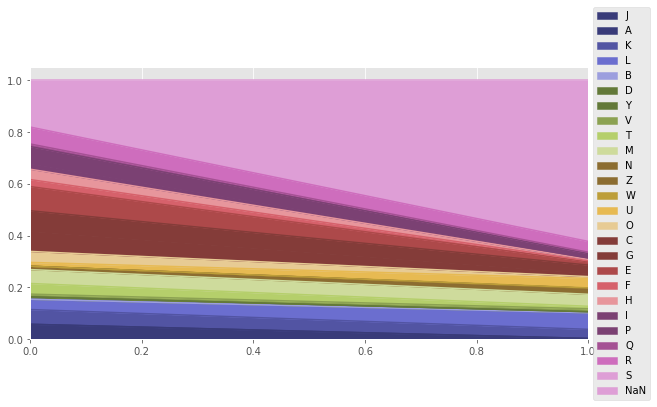

In [37]:
freq_cog.plot(kind = 'area', figsize = (10,5), stacked=True, colormap = 'tab20b').legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [72]:
eli_nan = both_cog.iloc[:, 0:25] # 2573, 5840
eli_nan.sum(axis = 1)

0    2673.0
1    5840.0
dtype: float64

In [73]:
eli_nan.sum(axis = 1)
elif_cog = eli_nan
elif_cog.iloc[0,:] = both_cog.iloc[0,:]/2673
elif_cog.iloc[1,:] = both_cog.iloc[1,:]/5840


In [70]:
(elif_cog.iloc[0,:]/elif_cog.iloc[1,:]).sort_values()

W     0.000000
U     0.876553
N     1.226495
L     1.355150
V     2.014034
M     2.533680
R     3.422424
K     3.541627
S     3.727706
Q     4.113168
A     5.035085
D     5.130086
G     5.492820
P     8.168507
T     9.295541
I    10.070170
C    12.851984
O    13.144221
F    14.732285
H    15.921755
E    16.171508
J    42.294712
B          NaN
Y          NaN
Z          NaN
dtype: float64

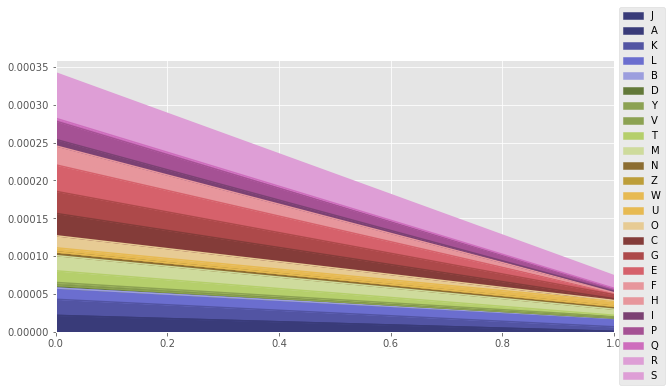

In [69]:
elif_cog.plot(kind = 'area', figsize = (10,5), stacked=True, colormap = 'tab20b').legend(loc='center left', bbox_to_anchor=(1, 0.5))

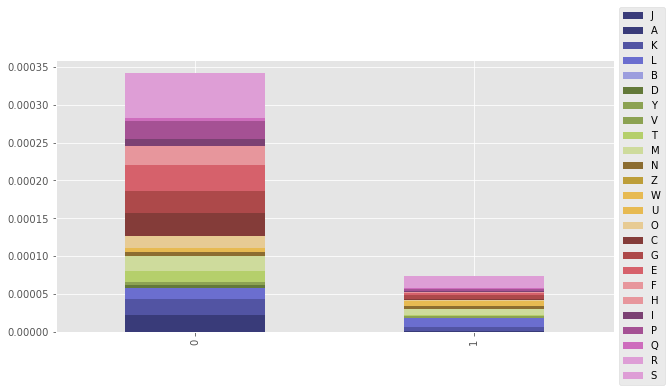

In [42]:
elif_cog.plot(kind = 'bar', figsize = (10,5), stacked=True, colormap = 'tab20b').legend(loc='center left', bbox_to_anchor=(1, 0.5))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f59d4af6320>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x7f59d4419f60>], dtype=object)

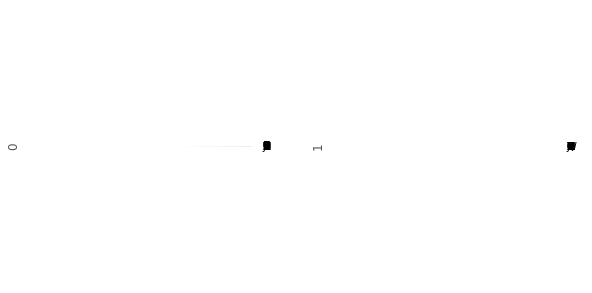

In [68]:
elif_cog.transpose().plot(kind = 'pie', figsize = (10,5), subplots = True, stacked=True, colormap = 'tab20b', legend = False)